In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f']


In [4]:
results_path = "/Volumes/noamaz/modularity/retina/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

mean_metric_name = "max_performance"
task = "retina"
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

csv_names = [
    'retina_e/',
    'retina_b/2023-08-06-13-21-11_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'retina_c/2023-08-06-14-15-36_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'retina_a/2023-07-15-14-01-13_all_results_from_retina_teach_archs_results_with_motifs_no_duplicates.csv',
    'retina_d/',
]
num_layerss = [1, 2, 3, 3, 4, 5]
num_neuronss = [8, 11, 15, 18, 20, 22]
inds = [(0, 0), (0, 1), (0,2), (1, 0), (1, 1), (1,2)]
csv_names = [
    'retina_e/2023-08-06-17-10-15_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'retina_b/2023-08-06-13-21-11_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'retina_f/2023-08-06-17-43-42_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'retina_c/2023-08-06-14-15-36_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
    'retina_a/2023-07-15-14-01-13_all_results_from_retina_teach_archs_results_with_motifs_no_duplicates.csv',
    'retina_d/2023-08-06-16-07-55_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv',
]


In [6]:
results = []
for i, csv_name in enumerate(csv_names):
    results.append(pd.read_csv(f"{results_path}/{csv_name}"))

In [25]:
first_analysis_df = pd.read_csv(f"{results_path}/retina_f/2023-08-06-17-43-42_all_results_from_teach_archs_results_with_motifs.csv")
all_res_no_duplicates = first_analysis_df.drop_duplicates(subset=[
        'modularity',
        'num_connections',
        'entropy',
        'normed_entropy',
        'connectivity_ratio',

        'motifs_count_0',
        'motifs_count_1',
        'motifs_count_2',

    ])
all_res_no_duplicates.shape

(18015, 16)

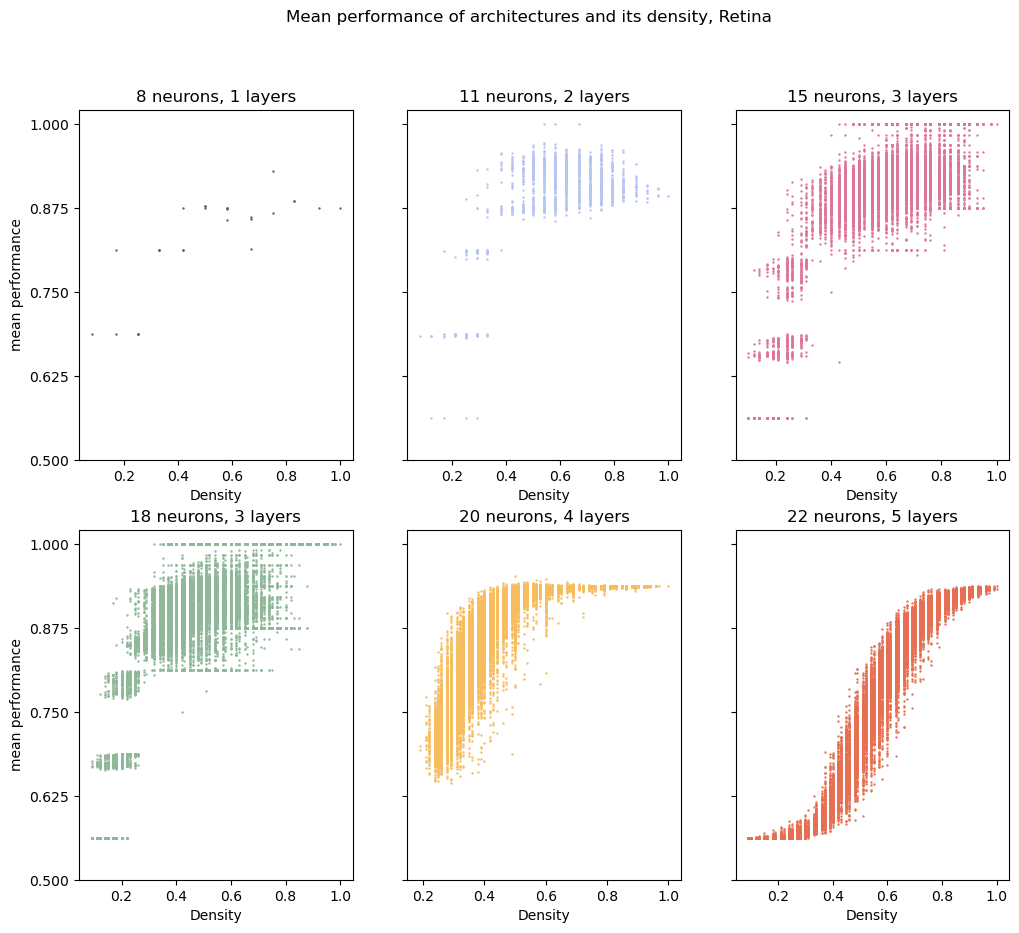

In [61]:
mean_metric_name = 'mean_performance'
metric_name = 'connectivity_ratio'
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharey='all')
min_mean_performance = 1.0
max_mean_performance = 1.0
for i, (num_neuron, num_layers, ind) in enumerate(zip(num_neuronss, num_layerss, inds)):
    j, k = ind
    result_df = results[i]
    axs[j, k].scatter(result_df[metric_name], result_df[mean_metric_name], c=COLORS[i],
                      s=0.5
                      )
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
    min_mean_performance = min(min_mean_performance,result_df[mean_metric_name]. min() )

    axs[j, k].set_xlabel('Density')
y_tixs = np.linspace(np.floor(min_mean_performance *10)/10,max_mean_performance, 5)
for j, k in inds:
    axs[j, k].set_yticks(y_tixs)
#plt.legend()
axs[0, 0].set_ylabel(f'mean performance')
axs[1, 0].set_ylabel(f'mean performance')
fig.suptitle(f'Mean performance of architectures and its density, Retina', wrap=True)
plt.savefig(
    f"{local_base_path}/plots/retina_multi_archs/{time_str}_{task}_{metric_name}_vs_{mean_metric_name}_multi_archs.png")
plt.show()


In [64]:
a = pd.read_csv(
    f'{results_path}/retina_b/2023-08-06-13-21-11_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv')

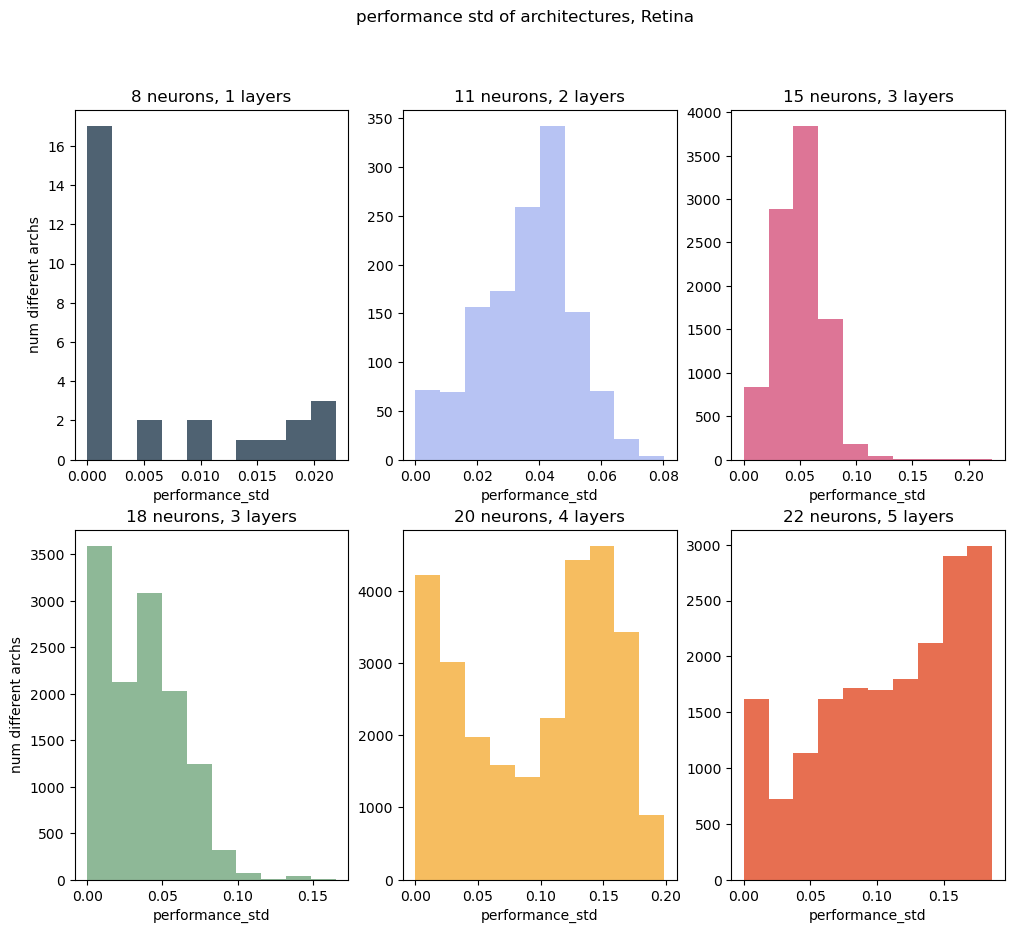

In [78]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), )
for i, (num_neuron, num_layers, ind) in enumerate(zip(num_neuronss, num_layerss, inds)):
    j, k = ind
    result_df = results[i]
    axs[j, k].hist(result_df['performance_std'], color=COLORS[i],         )
    axs[j, k].set_xlabel('performance_std')
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
axs[0, 0].set_ylabel(f'num different archs')
axs[1, 0].set_ylabel(f'num different archs')
fig.suptitle(f'performance std of architectures, Retina', wrap=True)
plt.savefig(
    f"{local_base_path}/plots/retina_multi_archs/{time_str}_performance_std_multi_archs.png")
plt.show()

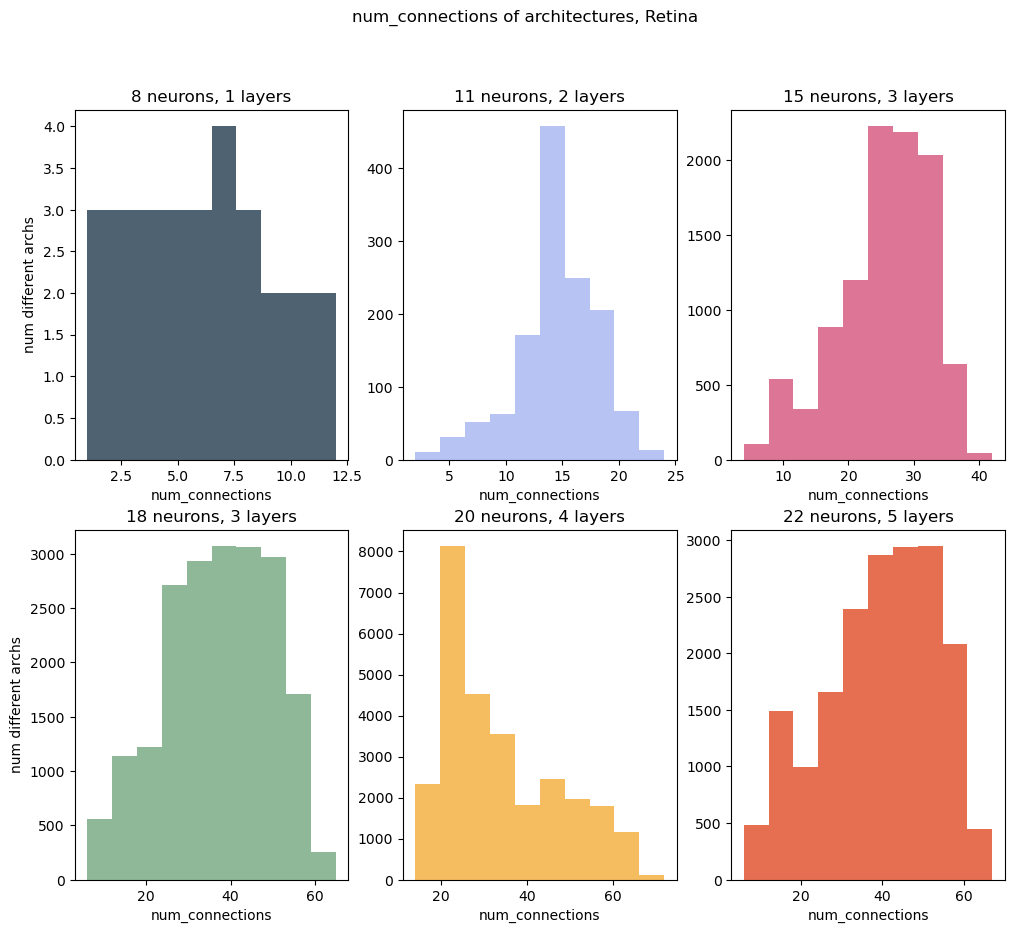

In [80]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), )
for i, (num_neuron, num_layers, ind) in enumerate(zip(num_neuronss, num_layerss, inds)):
    j, k = ind
    result_df = results[i]
    axs[j, k].hist(result_df['num_connections'], color=COLORS[i],         )
    axs[j, k].set_xlabel('num_connections')
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
axs[0, 0].set_ylabel(f'num different archs')
axs[1, 0].set_ylabel(f'num different archs')
fig.suptitle(f'num_connections of architectures, Retina', wrap=True)
plt.show()

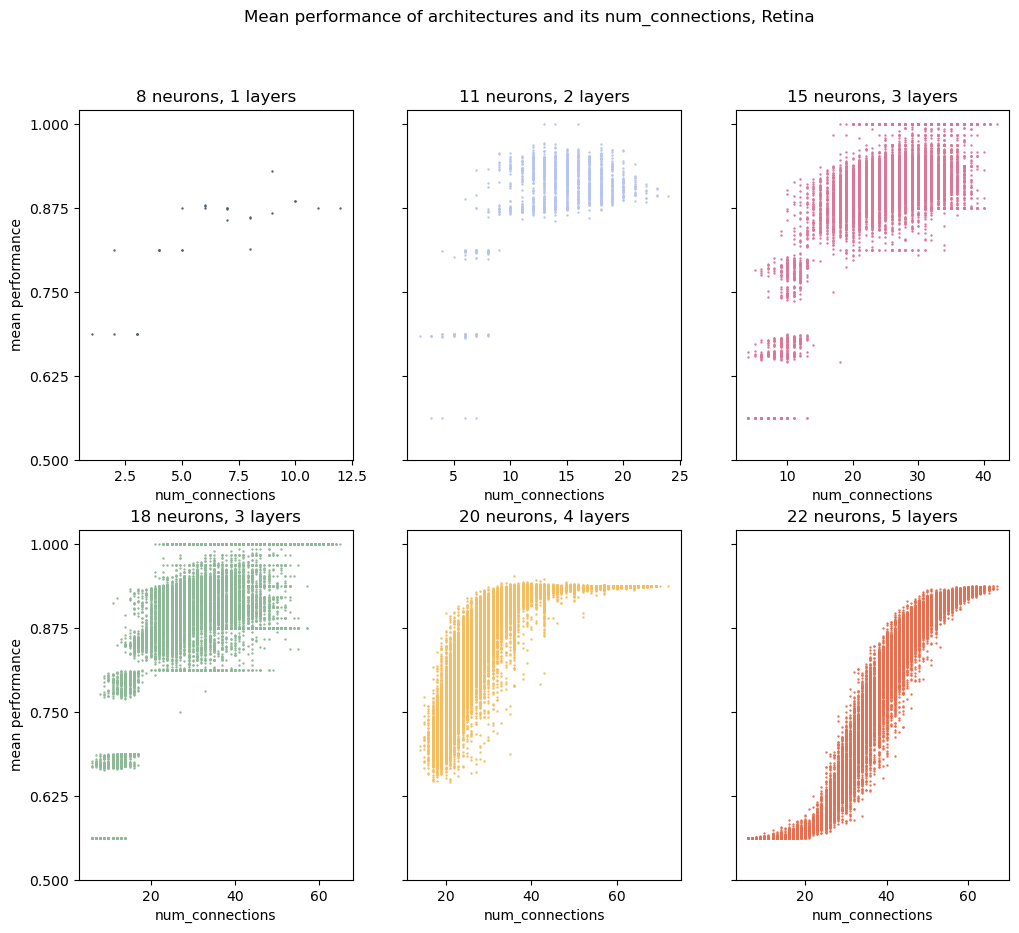

In [82]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharey='all')
min_mean_performance = 1.0
max_mean_performance = 1.0
for i, ( num_neuron, num_layers, ind) in enumerate(zip( num_neuronss, num_layerss, inds)):
    result_df = results[i]
    j, k = ind
    result_df = pd.read_csv(f"{results_path}/{csv_name}")
    axs[j, k].scatter(result_df['num_connections'], result_df[mean_metric_name], c=COLORS[i],
                      s=0.5
                      )
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
    min_mean_performance = min(min_mean_performance,result_df[mean_metric_name]. min() )

    axs[j, k].set_xlabel('num_connections')
y_tixs = np.linspace(np.floor(min_mean_performance *10)/10,max_mean_performance, 5)
for j, k in inds:
    axs[j, k].set_yticks(y_tixs)
#plt.legend()
axs[0, 0].set_ylabel(f'mean performance')
axs[1, 0].set_ylabel(f'mean performance')
fig.suptitle(f'Mean performance of architectures and its num_connections, Retina', wrap=True)
plt.show()


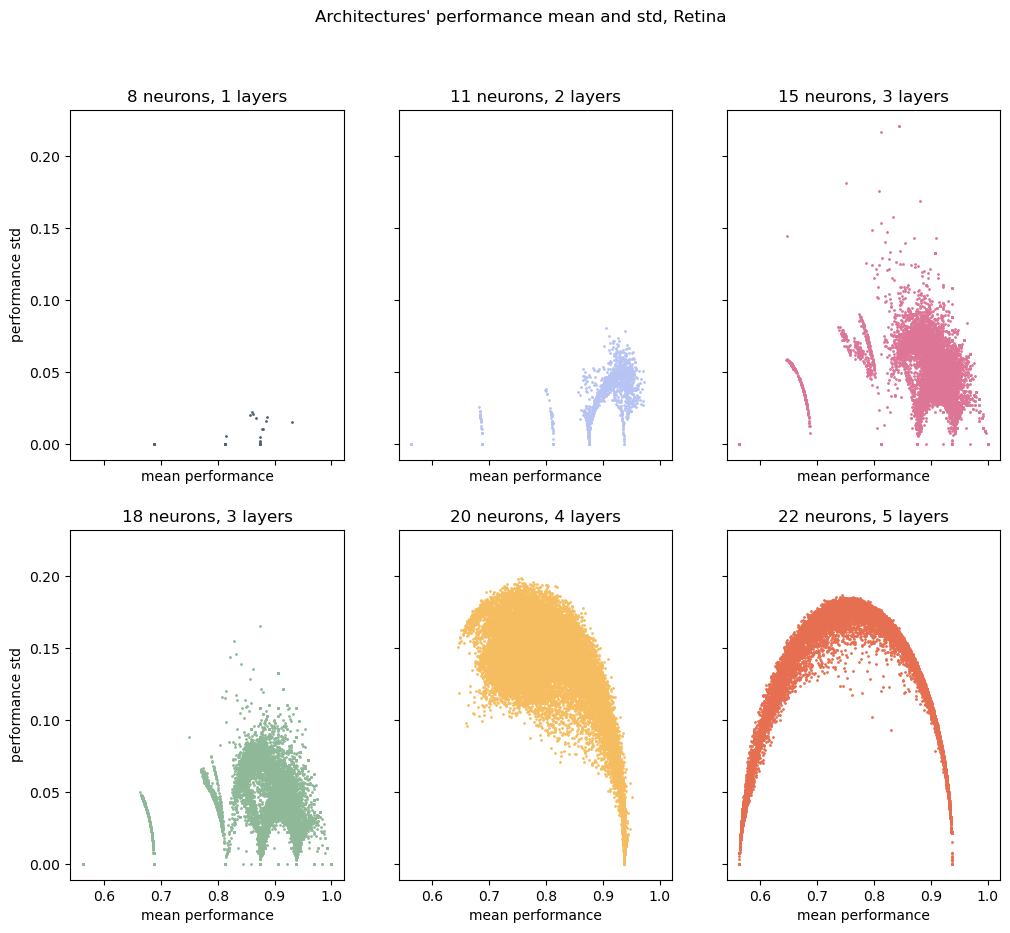

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharey='all', sharex='all')
min_mean_performance = 1.0
max_mean_performance = 1.0
for i, ( num_neuron, num_layers, ind) in enumerate(zip( num_neuronss, num_layerss, inds)):
    result_df = results[i]
    j, k = ind
    axs[j, k].scatter(  result_df['mean_performance'], result_df['performance_std'], c=COLORS[i],
                      s=1.0
                      )
    axs[j, k].set_title(f'{num_neuron} neurons, {num_layers} layers')
    min_mean_performance = min(min_mean_performance,result_df[mean_metric_name]. min() )

    axs[j, k].set_xlabel('mean performance')
y_tixs = np.linspace(np.floor(min_mean_performance *10)/10,max_mean_performance, 5)
#for j, k in inds:
 #   axs[j, k].set_yticks(y_tixs)
#plt.legend()
axs[0, 0].set_ylabel(f'performance std')
axs[1, 0].set_ylabel(f'performance std')
fig.suptitle(f"Architectures' performance mean and std, Retina", wrap=True)
plt.savefig(
    f"{local_base_path}/plots/retina_multi_archs/{time_str}_{task}_archs_mean_and_std.png")
plt.show()
